## Finall Project

- Student ID: 20127514
- Full Name: Trần Thị Bảo Hương

# Collecting data

## What subject is your data about? 

The subject of data: Water potability

## What is the source of your data?
Author:

## You can check the data license



## How did authors collect data?



# Import 

In [136]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# Read File

In [137]:
data_df = pd.read_csv('water_potability.csv')
data_df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

# Exploring data


### Số dòng và số cột

In [138]:
n_row = len(data_df)
n_col = len(data_df.columns)
print ('Số dòng', n_row, '\nSố cột', n_col)

Số dòng 3276 
Số cột 10


### Ý nghĩa các dòng

Mỗi dòng là số liệu của một mẫu nước, bao gồm: độ ph, Hardness,	Solids,	Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes,	Turbidity, Potability

### Có hàng nào bị trùng hay không?

In [139]:
data_df.duplicated().all()

False

### What is the meaning of each column?

Ý nghĩa của các giá trị

|Column name | Decription|
|---|----------------|
|pH value|PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards|
|Hardness|Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium|
|Solids (Total dissolved solids - TDS)|Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose|
|Chloramines|Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water|
|Sulfate|Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations|
|Conductivity|Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm|
|Organic_carbon|Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment|
|Trihalomethanes|THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water|
|Turbidity|The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU|
|Potability|Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable|

Ý nghĩa các cột

|Name column|Mean column|
|-----------|----------|
|ph| pH of 1. water (0 to 14)|
|Hardness| Capacity of water to precipitate soap in mg/L|
|Solids| Total dissolved solids in ppm|
|Chloramines| Amount of Chloramines in pp|
|Sulfate| Amount of Sulfates dissolved in mg/L|
|Conductivity| Electrical conductivity of water in μS/cm|
|Organic_carbon| Amount of organic carbon in ppm|
|Trihalomethanes| Amount of Trihalomethanes in μg/L|
|Turbidity| Measure of light emiting property of water in NTU|
|Potability| Indicates if water is safe for human consumption. Potable -1 and Not potable -0|

### What is the current data type of each column? 

In [140]:
data_df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

### Are there columns having inappropriate data types?

What is the percentage of missing values?


In [141]:
data_df.isnull().sum(axis=0)/n_row*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

Min? max? Are they abnormal?

In [142]:
pd.DataFrame([data_df.max(axis=0),data_df.min(axis=0)], index=['max', 'min'])


ph  Hardness        Solids  Chloramines     Sulfate  Conductivity  \
max  14.0   323.124  61227.196008       13.127  481.030642    753.342620   
min   0.0    47.432    320.942611        0.352  129.000000    181.483754   

     Organic_carbon  Trihalomethanes  Turbidity  Potability  
max            28.3          124.000      6.739         1.0  
min             2.2            0.738      1.450         0.0

Nhận xét: Các giá trị không có bất thường

In [143]:
data_df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

### Fill in the missing value
Nhận thấy ở cột ph, Sulfate, và Trihalomethanes có các giá trị thiếu. tiến hành điền các giái trị thiếu là mean

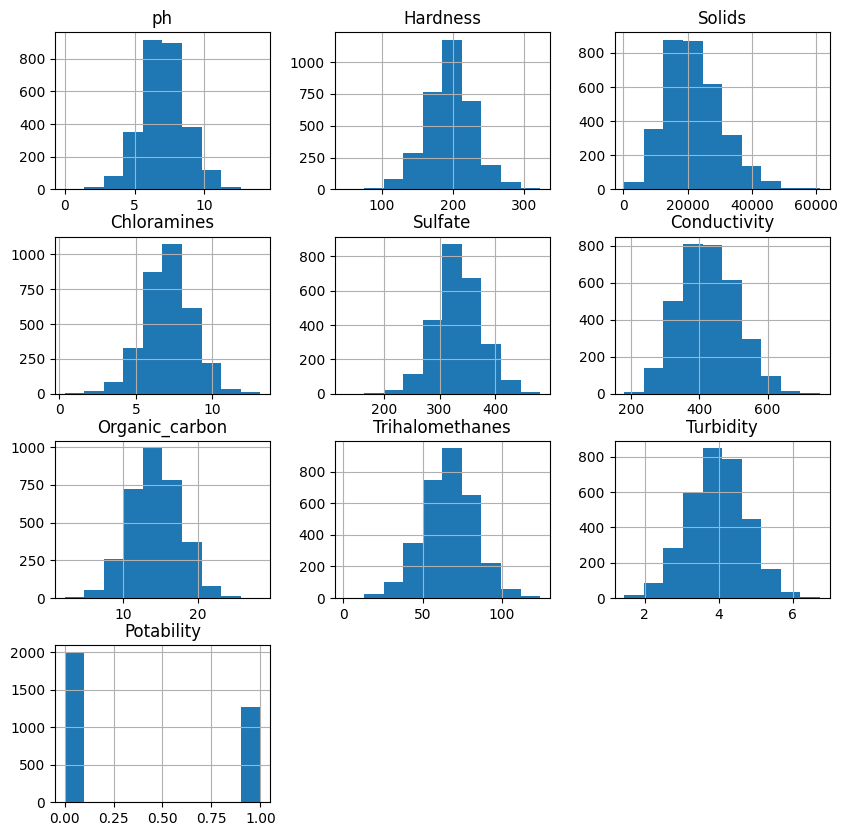

In [144]:
p = data_df.hist(figsize = (10,10))


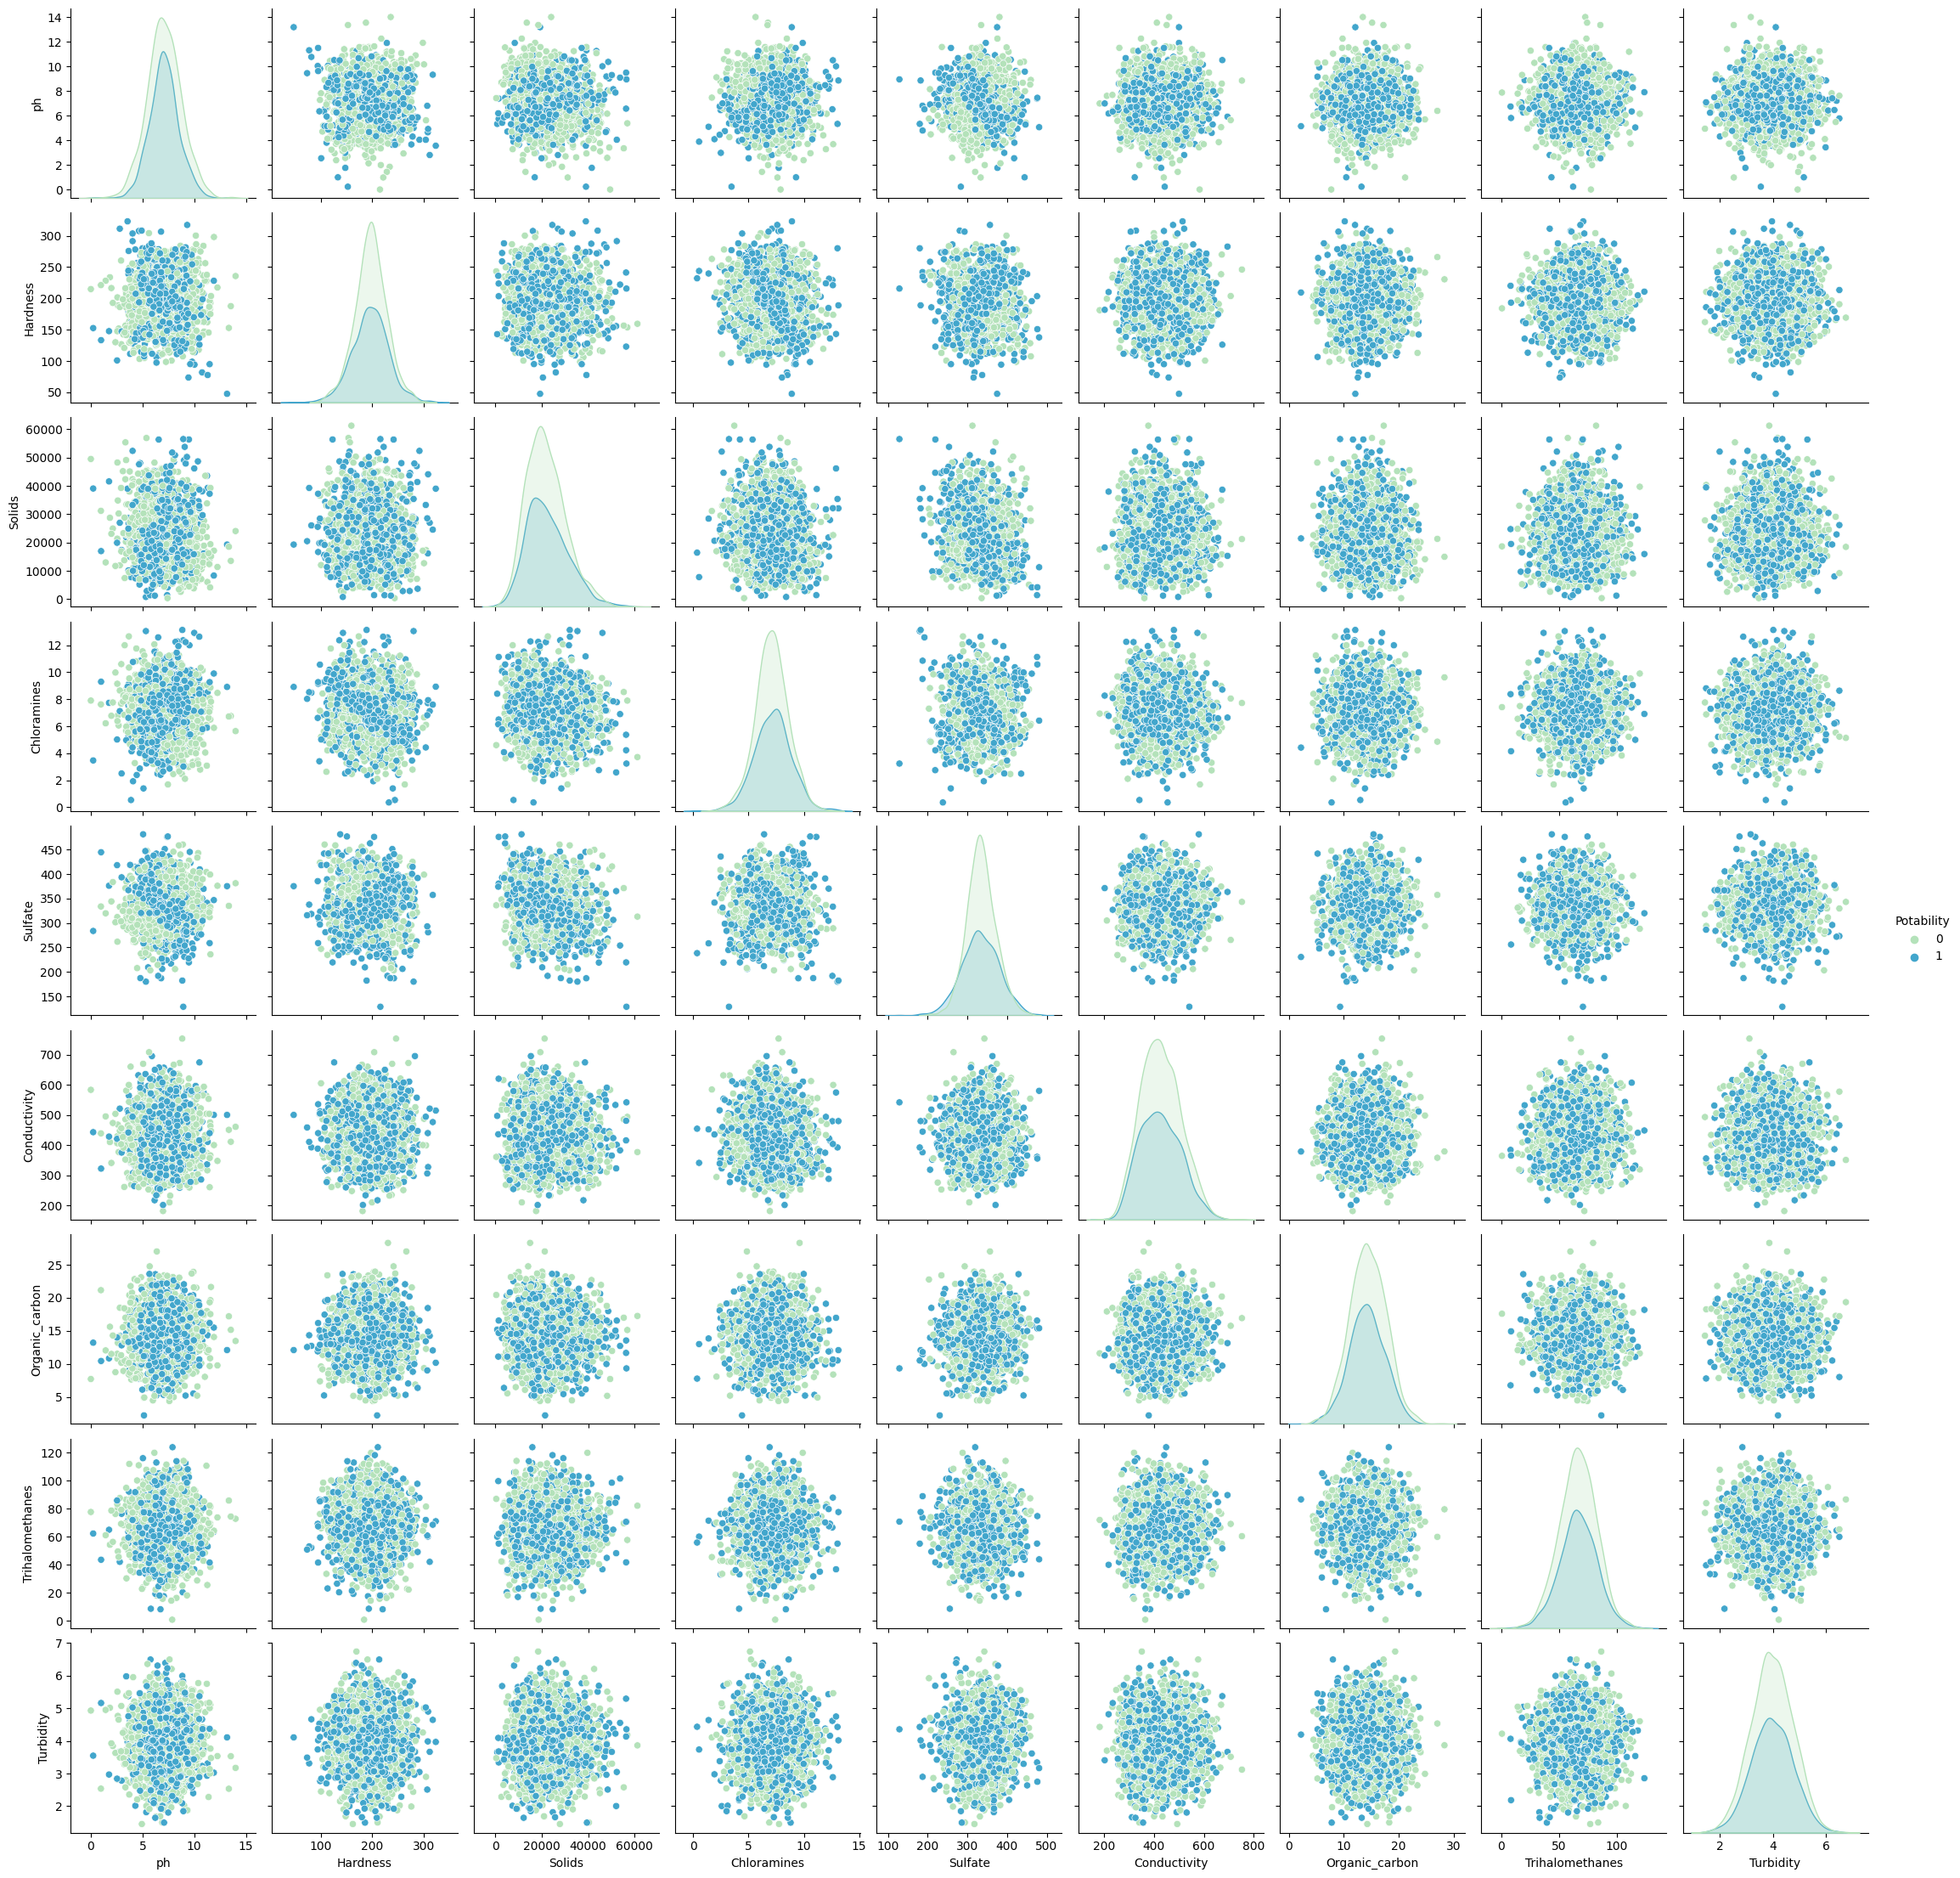

In [145]:
sns.pairplot(data=data_df, hue='Potability', palette='GnBu')

In [146]:
data_df['ph'].fillna(data_df['ph'].mean(), inplace=True)
data_df['Sulfate'].fillna(data_df['Sulfate'].mean(), inplace=True)
data_df['Trihalomethanes'].fillna(data_df['Trihalomethanes'].mean(), inplace=True)

In [147]:
data_df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

Đặc điểm của các mẫu nước an toàn

Các mẫu nước được xem là an toàn liệu có phù hợp với các thông số do WHO đưa ra

In [148]:
dataSafe = data_df[data_df['Potability']==1]
dataSafe.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  1278.000000  1278.000000   1278.000000  1278.000000  1278.000000   
mean      7.074754   195.800744  22383.991018     7.169338   332.844122   
std       1.343955    35.547041   9101.010208     1.702988    41.868471   
min       0.227499    47.432000    728.750830     0.352000   129.000000   
25%       6.351824   174.330531  15668.985035     6.094134   313.052947   
50%       7.080795   196.632907  21199.386614     7.215163   333.775777   
75%       7.780068   218.003420  27973.236446     8.199261   354.807924   
max      13.175402   323.124000  56488.672413    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1278.000000     1278.000000      1278.000000  1278.000000      1278.0  
mean     425.383800       14.160893        66.533513     3.968328         1.0  
std       82.048446        3.263907        15.971968     0.780842         0.0  
min      201.619737        2.200000         8.175876     1.492207         1.0  
25%      360.939023       12.033897        56.911186     3.430909         1.0  
50%      420.712729       14.162809        66.396293     3.958576         1.0  
75%      484.155911       16.356245        77.067457     4.509569         1.0  
max      695.369528       23.604298       124.000000     6.494249         1.0

Nhận xét các giá trị thông số này gần như ko phù hợp với các chỉ số WHO đưa ra về nước uống được.
- Ví dụ giá trị pH. Who đề nghị giá trị này giao động từ 6.5 đến 8.5 nhưng thực tế bộ dữ liệu này giá trị lại từ 0.22 đến 13.17

Đối với các giá trị tiến hành điền theo KNN.

In [150]:
impute =  KNNImputer(n_neighbors = 10, weights = "uniform")
imputed = impute.fit_transform(data_df)
data_filled = pd.DataFrame(imputed,columns = data_df.columns)
data_filled.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000